In [110]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

results = pd.read_csv('results.csv',sep=',')

In [111]:
# Apply the conversion function to all values in the DataFrame
results = results.applymap(eval)

In [112]:
new_df = pd.DataFrame()

for col in results.columns:
    new_df[col] = results[col].apply(np.median)

In [113]:
# Get the last row and sort its values in descending order
last_row = new_df.iloc[-1]
sorted_values = last_row.sort_values(ascending=False)

# Print the column names and corresponding values in descending order
for column_name, value in sorted_values.items():
    print(f"{column_name}: {value}")

tournament_selection|eager_breader_crossover|swap_mutation|elitism_True: 78800.0
tournament_selection|eager_breader_crossover|dream_team|elitism_True: 78800.0
tournament_selection|eager_breader_crossover|merge_and_split|elitism_True: 78400.0
tournament_selection|eager_breader_crossover|the_hop|elitism_True: 78300.0
tournament_selection|gbx_crossover|swap_mutation|elitism_False: 78250.0
tournament_selection|gbx_crossover|the_hop|elitism_False: 78250.0
tournament_selection|eager_breader_crossover|swap_mutation|elitism_False: 77950.0
tournament_selection|gbx_crossover|dream_team|elitism_False: 77550.0
tournament_selection|gbx_crossover|merge_and_split|elitism_False: 77500.0
tournament_selection|gbx_crossover|merge_and_split|elitism_True: 77350.0
tournament_selection|gbx_crossover|the_hop|elitism_True: 77250.0
tournament_selection|gbx_crossover|swap_mutation|elitism_True: 76550.0
tournament_selection|eager_breader_crossover|the_hop|elitism_False: 76450.0
tournament_selection|eager_breader_

In [114]:
new_df

,tournament_selection|eager_breader_crossover|the_hop|elitism_True,tournament_selection|eager_breader_crossover|the_hop|elitism_False,tournament_selection|eager_breader_crossover|merge_and_split|elitism_True,tournament_selection|eager_breader_crossover|merge_and_split|elitism_False,tournament_selection|eager_breader_crossover|swap_mutation|elitism_True,tournament_selection|eager_breader_crossover|swap_mutation|elitism_False,tournament_selection|eager_breader_crossover|dream_team|elitism_True,tournament_selection|eager_breader_crossover|dream_team|elitism_False,tournament_selection|gbx_crossover|the_hop|elitism_True,tournament_selection|gbx_crossover|the_hop|elitism_False,...,tournament_selection|gbx_crossover|dream_team|elitism_True,tournament_selection|gbx_crossover|dream_team|elitism_False,tournament_selection|twin_maker|the_hop|elitism_True,tournament_selection|twin_maker|the_hop|elitism_False,tournament_selection|twin_maker|merge_and_split|elitism_True,tournament_selection|twin_maker|merge_and_split|elitism_False,tournament_selection|twin_maker|swap_mutation|elitism_True,tournament_selection|twin_maker|swap_mutation|elitism_False,tournament_selection|twin_maker|dream_team|elitism_True,tournament_selection|twin_maker|dream_team|elitism_False
0,44600.0,44350.0,44300.0,43150.0,44700.0,44800.0,44100.0,44750.0,34050.0,34100.0,...,34600.0,34150.0,24500.0,22950.0,23300.0,24350.0,23550.0,23150.0,24400.0,25450.0
1,59300.0,60900.0,60200.0,59600.0,60550.0,60400.0,59300.0,59000.0,44200.0,44450.0,...,44500.0,44850.0,26150.0,24350.0,24900.0,25200.0,25350.0,25050.0,27750.0,26600.0
2,68050.0,68750.0,68950.0,67700.0,68250.0,69200.0,67650.0,68450.0,51800.0,52050.0,...,52150.0,52750.0,27800.0,25300.0,27200.0,26750.0,28050.0,26050.0,29500.0,27900.0
3,72950.0,73100.0,73350.0,72450.0,72550.0,73000.0,72750.0,73200.0,56650.0,57700.0,...,56450.0,56350.0,28400.0,27850.0,27800.0,27500.0,28650.0,25750.0,30450.0,28600.0
4,74150.0,75600.0,75400.0,74550.0,75850.0,75350.0,74800.0,75750.0,60700.0,60700.0,...,61050.0,60200.0,29500.0,28600.0,30550.0,28700.0,30200.0,27650.0,32250.0,29950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,78300.0,76450.0,78400.0,76550.0,78800.0,77950.0,78800.0,76700.0,77250.0,78250.0,...,76350.0,77550.0,49300.0,53950.0,56800.0,58800.0,52050.0,59550.0,53550.0,57650.0
96,78300.0,76450.0,78400.0,76450.0,78800.0,77950.0,78800.0,76700.0,77250.0,78250.0,...,76350.0,77550.0,49300.0,53950.0,56800.0,58800.0,52050.0,59550.0,53550.0,57650.0
97,78300.0,76450.0,78400.0,76450.0,78800.0,77950.0,78800.0,76450.0,77250.0,78250.0,...,76350.0,77550.0,49300.0,53950.0,56800.0,58800.0,52050.0,59550.0,53550.0,57650.0
98,78300.0,76450.0,78400.0,76450.0,78800.0,77950.0,78800.0,76450.0,77250.0,78250.0,...,76350.0,77550.0,49300.0,53950.0,56800.0,58800.0,52050.0,59550.0,53900.0,57650.0


In [120]:
best_columns_avg = new_df.tail(1).max().nlargest(5).index

In [102]:
for col in new_df[best_columns_avg].columns:
    new_df[col+'_std'] = results[col].apply(np.std)

In [104]:
average_columns = new_df[best_columns_avg]
std_dev_columns = new_df[best_columns_avg+'_std']

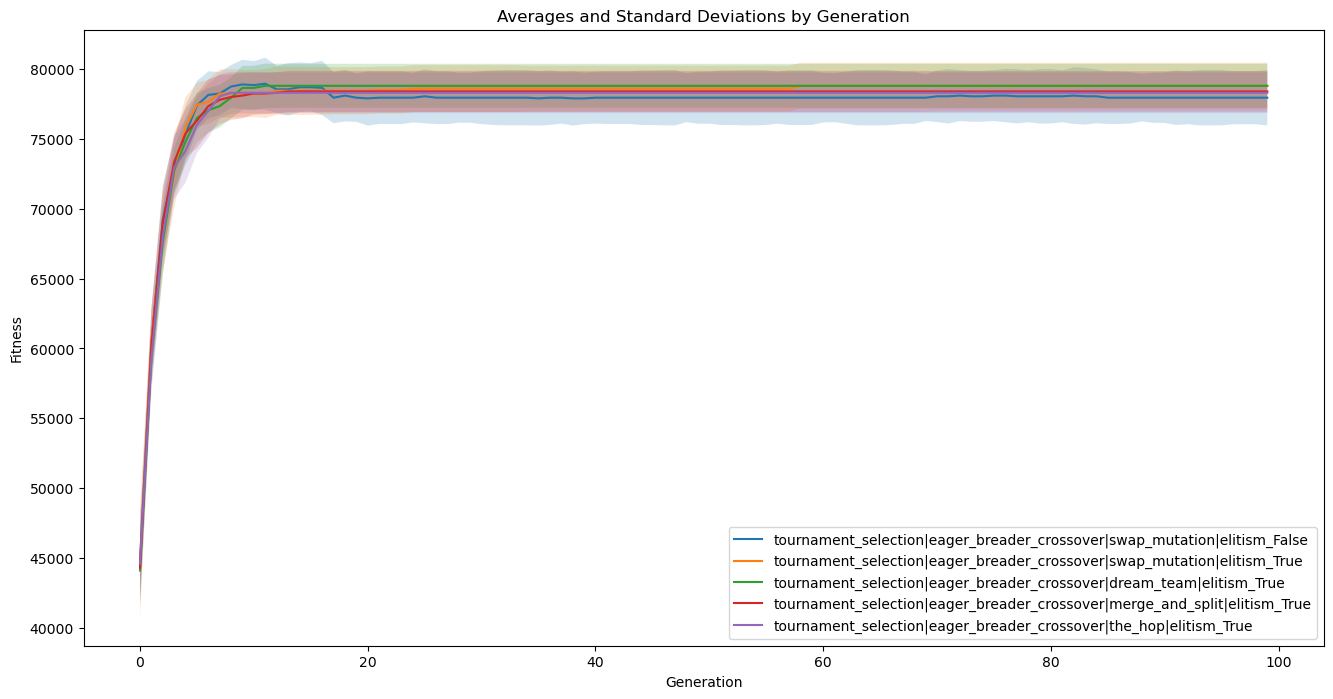

In [105]:
plt.figure(figsize=(16, 8))

# Plot the averages with filled areas representing standard deviations
for avg_col, std_col in zip(average_columns, std_dev_columns):
    average = new_df[avg_col]
    std_dev = new_df[std_col]
    plt.plot(new_df.index, average, label=avg_col)
    plt.fill_between(new_df.index, average - std_dev, average + std_dev, alpha=0.2)

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Averages and Standard Deviations by Generation')
plt.legend()
plt.show()

In [108]:
new_df = new_df.iloc[10:]

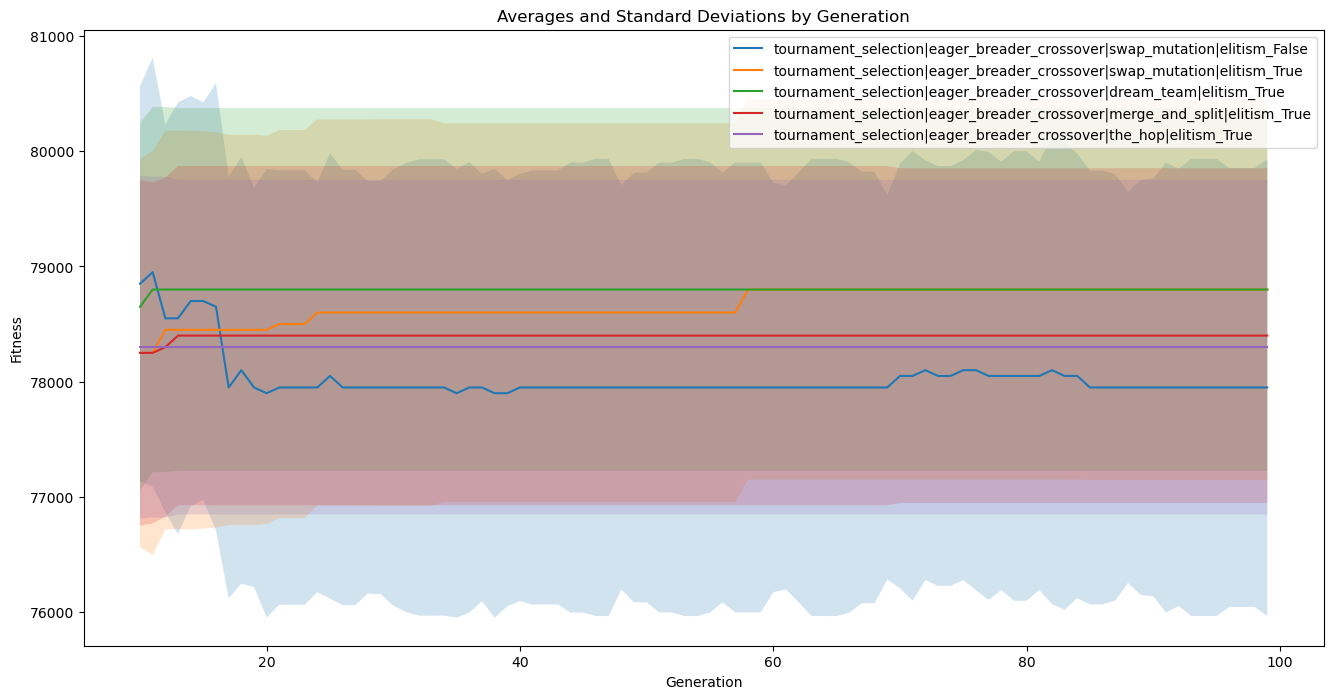

In [109]:
plt.figure(figsize=(16, 8))

# Plot the averages with filled areas representing standard deviations
for avg_col, std_col in zip(average_columns, std_dev_columns):
    average = new_df[avg_col]
    std_dev = new_df[std_col]
    plt.plot(new_df.index, average, label=avg_col)
    plt.fill_between(new_df.index, average - std_dev, average + std_dev, alpha=0.2) #, label=f'{std_col} Bandwidth'

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Averages and Standard Deviations by Generation')
plt.legend()
plt.show()